linear regrasyon denedim datalrı ayırdıktan sonra direk model soktum 
%6 acıklayıcılık var dusuk bir oran 
suffle yok trainde 
min max scale de yok 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_csv("final_data.csv")

In [3]:

df_train=pd.read_csv("train_data.csv")
df_test=pd.read_csv("test_data.csv")
df_val=pd.read_csv("validation_data.csv")


In [4]:

Train_X=df_train[["Alfas","Frenkans"]]
Train_Y=df_train["Emilim"]

Test_X=df_test[["Alfas","Frenkans"]]
Test_Y=df_test["Emilim"]

Val_X=df_val[["Alfas","Frenkans"]]
Val_Y=df_val["Emilim"]


In [5]:
Train_Y=Train_Y.values.reshape(-1,1)
Test_Y=Test_Y.values.reshape(-1,1)
Val_Y=Val_Y.values.reshape(-1,1)

In [6]:
# Her bir veri setinin boyutlarını yazdırma
print("Train_X shape:", Train_X.shape)
print("Train_Y shape:", Train_Y.shape)
print("Test_X shape:", Test_X.shape)
print("Test_Y shape:", Test_Y.shape)
print("Val_X shape:", Val_X.shape)
print("Val_Y shape:", Val_Y.shape)


Train_X shape: (27027, 2)
Train_Y shape: (27027, 1)
Test_X shape: (4004, 2)
Test_Y shape: (4004, 1)
Val_X shape: (3003, 2)
Val_Y shape: (3003, 1)


In [7]:
model = LinearRegression()
model.fit(Train_X, Train_Y)

LinearRegression()

In [8]:
print("xin onundeki kat sayılar:",model.coef_)
print("sabit deger var ya o:",model.intercept_)

xin onundeki kat sayılar: [[-0.0520226   0.00430997]]
sabit deger var ya o: [0.9840716]


In [9]:
val_predictions = model.predict(Val_X)


In [10]:
len(val_predictions)

3003

In [11]:
val_mse = mean_squared_error(Val_Y, val_predictions)
val_r2 = r2_score(Val_Y, val_predictions)
print(f"Validation MSE: {val_mse}")
print(f"Validation R2: {val_r2}")# bu modelin genel basarısı 

Validation MSE: 0.007737390678313072
Validation R2: -0.023060319252994788


# cizdirme asaması

In [12]:
import matplotlib.pyplot as plt


In [13]:
new_a = 1.99
filtered_data = df[df["Alfas"] == new_a]
true_ValuesForselectedAlfas=filtered_data["Emilim"]
Frenkans_for_only_one_Alfas = filtered_data["Frenkans"]
lenFrenkans=len(Frenkans_for_only_one_Alfas)
new_frequencies =  Frenkans_for_only_one_Alfas
new_data = pd.DataFrame({'Alfas': [new_a]*lenFrenkans, 'Frenkans': new_frequencies})
new_predictions = model.predict(new_data)

In [14]:
val_mse = mean_squared_error(true_ValuesForselectedAlfas, new_predictions)
val_r2 = r2_score(true_ValuesForselectedAlfas, new_predictions)
print(f"Validation MSE: {val_mse}")
print(f"Validation R2: {val_r2}")

Validation MSE: 0.004678123049703613
Validation R2: -8.896404368762505


In [15]:

def plot_emilim_values(frequencies, true_values, predicted_values,YLabel="Emilim", XLabel="Frekans", title="Gerçek ve Tahmin Edilen Emilim Değerleri"):
    """
    Frekanslara karşı gerçek ve tahmin edilen emilim değerlerini çizmek için bir fonksiyon.
    
    Parametreler:
        frequencies (array-like): X eksenindeki frekans değerleri.
        true_values (array-like): Gerçek emilim değerleri.
        predicted_values (array-like): Tahmin edilen emilim değerleri.
        label (str): Grafiğin başlığı. (Opsiyonel; varsayılan bir başlık atanır)
    """
    # Grafik oluşturma
    plt.figure(figsize=(10, 6)) 

    # Gerçek emilim değerlerini çiz
    plt.plot(frequencies, true_values, label="Gerçek Değerler", color="green", linewidth=2)

    # Tahmin edilen emilim değerlerini çiz
    plt.plot(frequencies, predicted_values, label="Tahmin Edilen Değerler", color="red", linestyle="--", linewidth=2)

    # Grafik başlıkları ve etiketler
    plt.title(title, fontsize=16)
    plt.xlabel(XLabel, fontsize=14)
    plt.ylabel(YLabel, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

    # Grafik gösterimi
    plt.show()


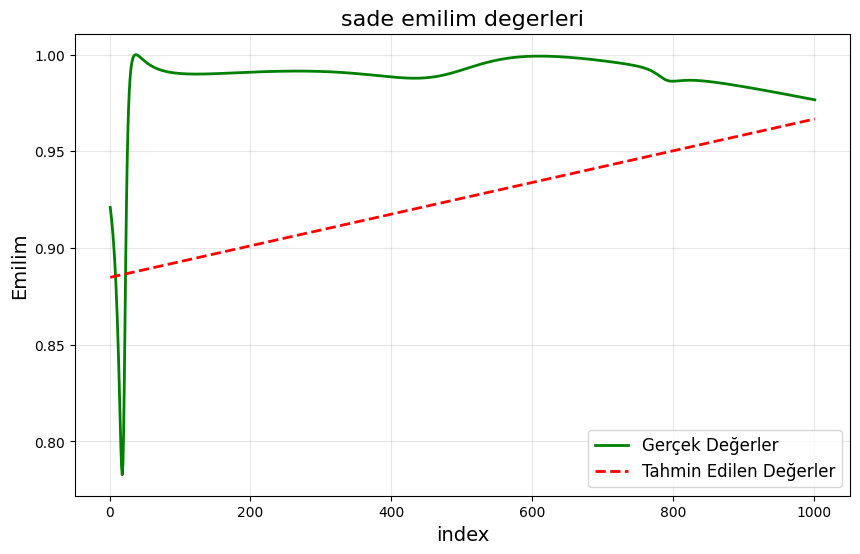

In [16]:
plot_emilim_values(range(1,1002),true_ValuesForselectedAlfas,new_predictions,title="sade emilim degerleri",XLabel="index")

In [17]:
import statsmodels.api as sm

In [18]:
X_train_ols = sm.add_constant(Train_X)

In [19]:
sm_model = sm.OLS(Train_Y, X_train_ols)
sonuc = sm_model.fit()
# OLS Özet tablosunu yazdır

print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     996.1
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:58:49   Log-Likelihood:                 27203.
No. Observations:               27027   AIC:                        -5.440e+04
Df Residuals:                   27024   BIC:                        -5.437e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9841      0.012     79.465      0.0